In [2]:
from transformers import ViTImageProcessor
from utils import download_imagenet_labels, overlay, overlay2, plot_auc_line
import time
from PIL import Image
from GradMask import GradMask

# Parameters

In [3]:
# Image processor for ViT model (only used for resizing image during the plot)
resizer = ViTImageProcessor(do_rescale=False, do_normalize=False)

# URL to download ImageNet labels
imagenet_labels_url = 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
class_labels = download_imagenet_labels(imagenet_labels_url)
class_labels_lower = [cls.lower() for cls in class_labels]
imagenet_label_dict = {index: label for index, label in enumerate(class_labels)}

In [4]:
masks_layers = 4

# ViT

In [5]:
# Initialize MUTEX model for ViT
model_vit = GradMask('vit', 'cpu')

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

## Single Image Plot

`ViTSdpaAttention` is used but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


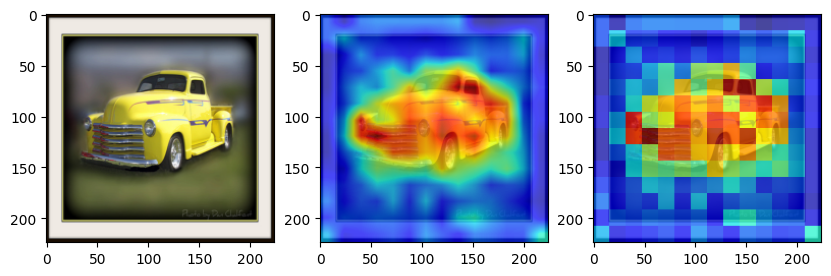

In [7]:
img_path = '../Example_images/pickup.jpg'

# Open the image using PIL
image = Image.open(img_path).convert('RGB')

# Resize and preprocess the image for the model
img = resizer(image, return_tensors="pt")['pixel_values'][0]

saliency, label = model_vit.get_saliency(img_path, masks_layers)

# Display overlay of image and saliency map
overlay(img, saliency)

## Multi image plot with AUC

In [14]:
img_paths = [
            '../Example_images/ski.jpg',
            '../Example_images/spoonbill.jpg',
            '../Example_images/pickup.jpg',
            ]

# Percentage of patches for insertion and deletion metrics
patch_perc = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Baseline for insertion and deletion calculation
baseline = 'black'

`DeiTSdpaAttention` is used but `torch.nn.functional.scaled_dot_product_attention` does not support `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


Time taken: 4.252909183502197


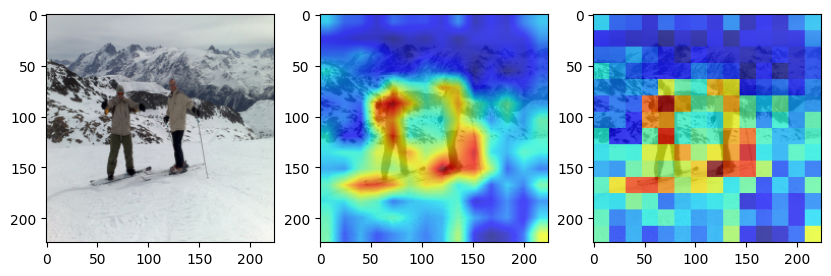

Time taken: 4.096705675125122


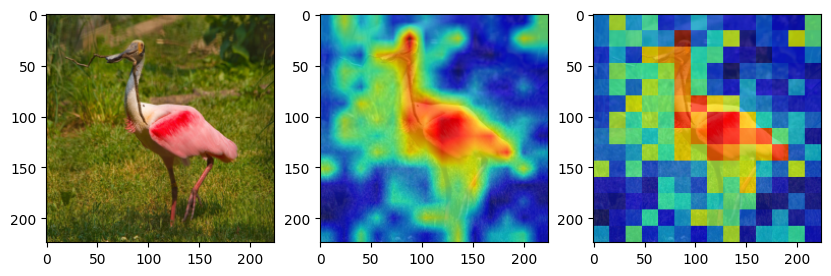

Time taken: 4.13442850112915


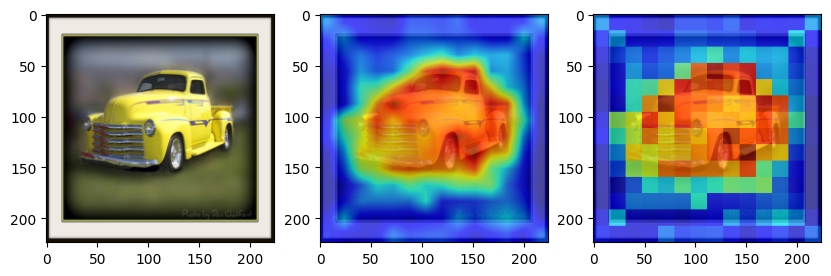

In [15]:
# Lists to store metrics, images, and labels
metrics_list = []
images_list = []
label_list = []
saliency_list = []

# Loop over each image path
for i in range(len(img_paths)):
    img_path = img_paths[i]
    start_time = time.time()

    # Get saliency map and label using MLEx model
    saliency, label = model_deit.get_saliency(img_path, masks_layers)
    print(f'Time taken: {time.time() - start_time}')

    # Open the image using PIL
    image = Image.open(img_path).convert('RGB')

    # Resize and preprocess the image for the model
    img = resizer(image, return_tensors="pt")['pixel_values'][0]

    # Display overlay of image and saliency map
    overlay(img, saliency)

    # Get insertion and deletion metrics
    metrics = model_deit.get_insertion_deletion(patch_perc, saliency, image, baseline, label)

    # Append metrics, image, and label to respective lists
    metrics_list.append(metrics)
    images_list.append(img)
    label_list.append(imagenet_label_dict[label + 1])
    saliency_list.append(saliency)

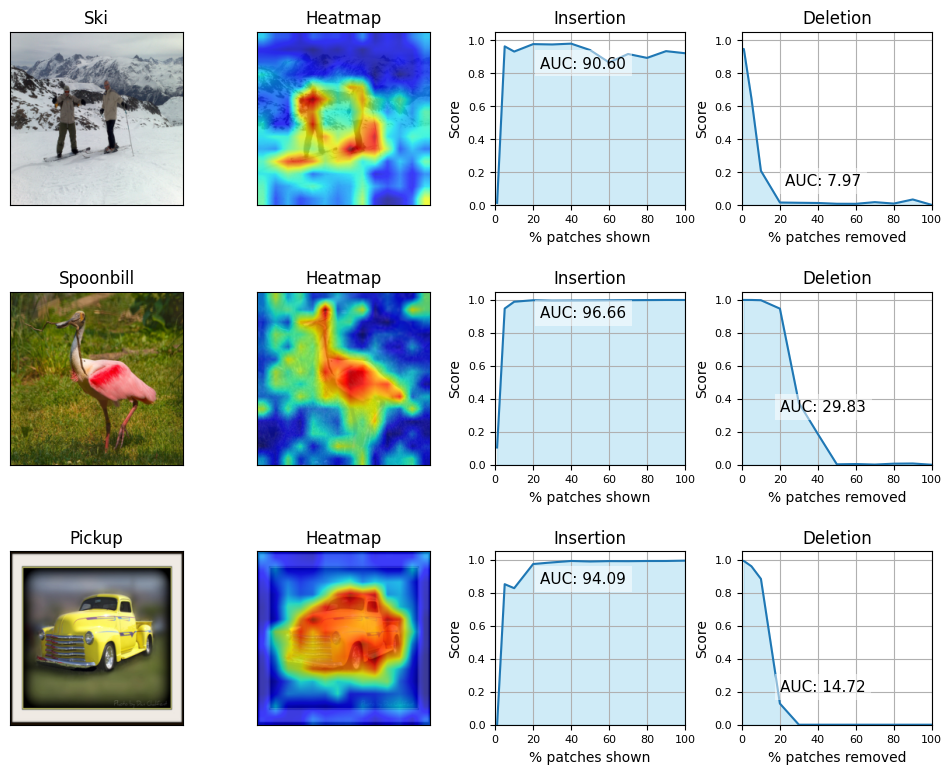

In [16]:
# Plot AUC curves for insertion and deletion metrics
plot_auc_line(metrics_list, patch_perc, images_list, label_list, saliency_list, title = 'AUC_ViT', figsize_x = 12, figsize_y = 3, alpha = 0.75)

## Multi class image

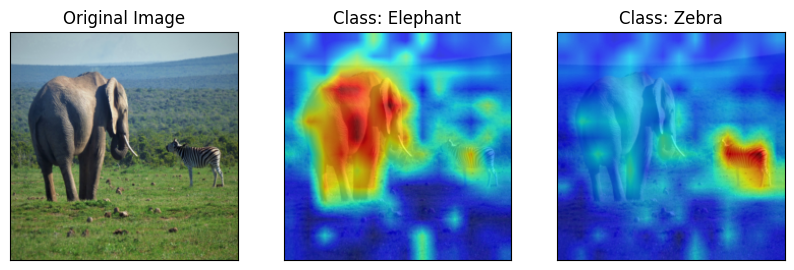

<Figure size 640x480 with 0 Axes>

In [11]:
img_path = '../Example_images/elefante-zebra.jpg'

# Open the image using PIL
image = Image.open(img_path).convert('RGB')

# Resize and preprocess the image for the model
img = resizer(image, return_tensors="pt")['pixel_values'][0]

saliency1, _ = model_vit.get_saliency(img_path, masks_layers, 385)
saliency2, _ = model_vit.get_saliency(img_path, masks_layers, 340)

# Display overlay of image and saliency map
overlay2(img, saliency1, saliency2, title = 'ViT_multiclass')

# DeiT

In [12]:
# Initialize MUTEX model for DeiT
model_deit = GradMask('deit', 'cpu')

config.json:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/349M [00:00<?, ?B/s]

## Single Image Plot

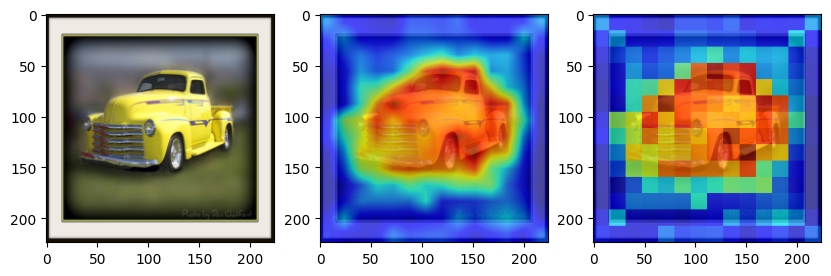

In [17]:
img_path = '../Example_images/pickup.jpg'

# Open the image using PIL
image = Image.open(img_path).convert('RGB')

# Resize and preprocess the image for the model
img = resizer(image, return_tensors="pt")['pixel_values'][0]

saliency, label = model_deit.get_saliency(img_path, masks_layers)

# Display overlay of image and saliency map
overlay(img, saliency)

## Multi image plot with AUC

In [18]:
# Percentage of patches for insertion and deletion metrics
patch_perc = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Baseline for insertion and deletion calculation
baseline = 'black'

Time taken: 3.955129861831665


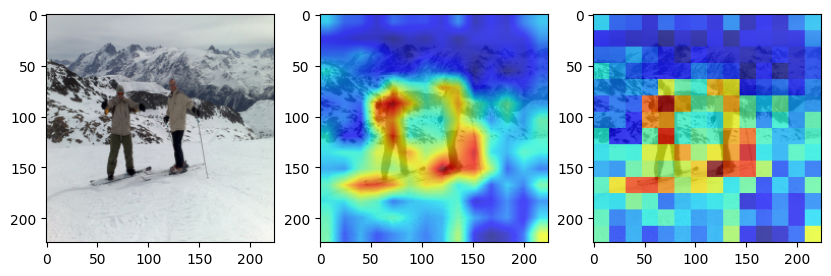

Time taken: 3.9647555351257324


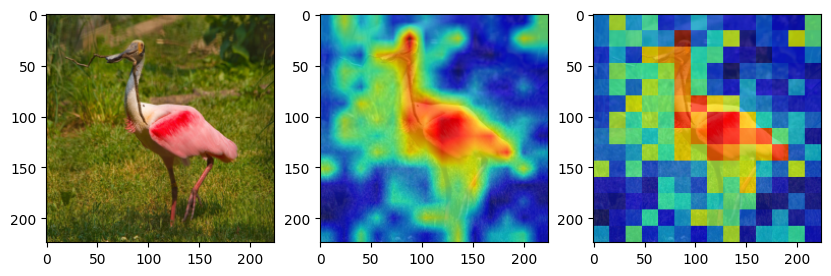

Time taken: 3.9921443462371826


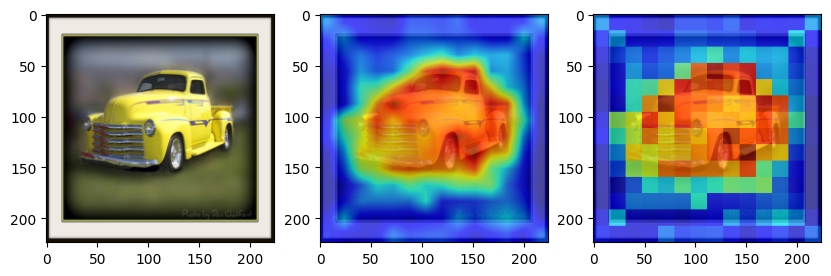

In [20]:
# Lists to store metrics, images, and labels
metrics_list = []
images_list = []
label_list = []
saliency_list = []

# Loop over each image path
for i in range(len(img_paths)):
    img_path = img_paths[i]
    start_time = time.time()

    # Get saliency map and label using MLEx model
    saliency, label = model_deit.get_saliency(img_path, masks_layers)
    print(f'Time taken: {time.time() - start_time}')

    # Open the image using PIL
    image = Image.open(img_path).convert('RGB')

    # Resize and preprocess the image for the model
    img = resizer(image, return_tensors="pt")['pixel_values'][0]

    # Display overlay of image and saliency map
    overlay(img, saliency)

    # Get insertion and deletion metrics
    metrics = model_deit.get_insertion_deletion(patch_perc, saliency, image, baseline, label)

    # Append metrics, image, and label to respective lists
    metrics_list.append(metrics)
    images_list.append(img)
    label_list.append(imagenet_label_dict[label + 1])
    saliency_list.append(saliency)

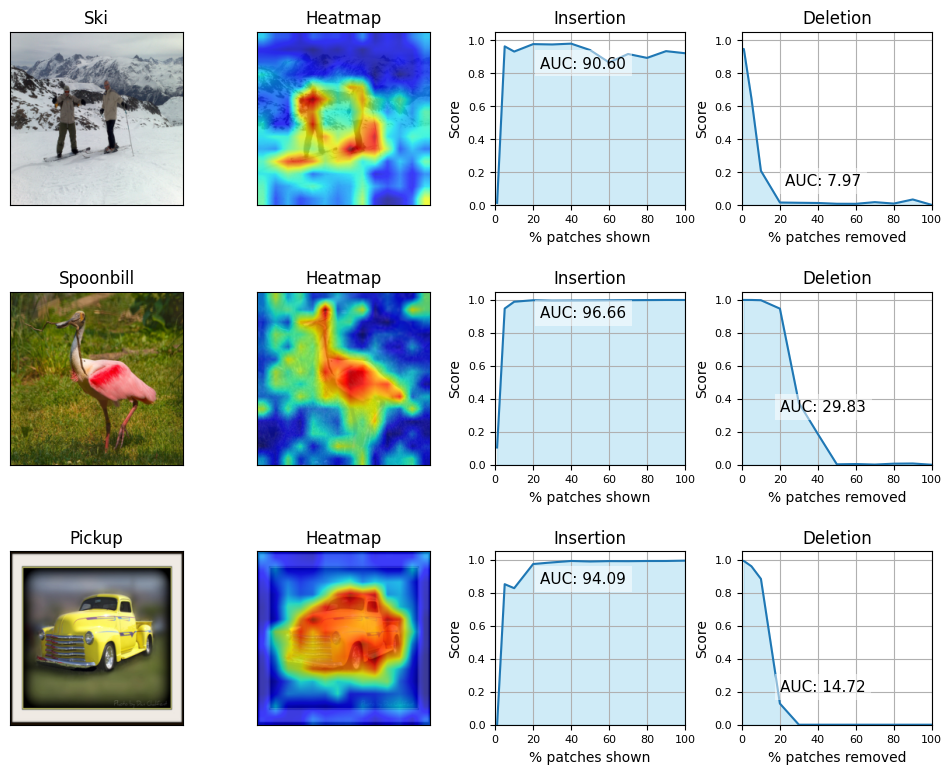

In [21]:
# Plot AUC curves for insertion and deletion metrics
plot_auc_line(metrics_list, patch_perc, images_list, label_list, saliency_list, title = 'AUC_DeiT', figsize_x = 12, figsize_y = 3, alpha = 0.75)

## Multi class image

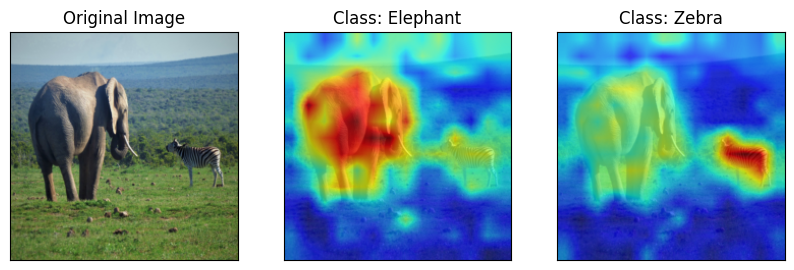

<Figure size 640x480 with 0 Axes>

In [22]:
img_path = '../Example_images/elefante-zebra.jpg'

# Open the image using PIL
image = Image.open(img_path).convert('RGB')

# Resize and preprocess the image for the model
img = resizer(image, return_tensors="pt")['pixel_values'][0]

saliency1, _ = model_deit.get_saliency(img_path, masks_layers, 385)
saliency2, _ = model_deit.get_saliency(img_path, masks_layers, 340)

# Display overlay of image and saliency map
overlay2(img, saliency1, saliency2, title = 'DeiT_multiclass')